> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`,
* `title` - `str`,
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`.

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [1]:
#### Escreva sua resposta aqui
from dataclasses import dataclass, field
from enum import Enum
from typing import List

# Criando o Enum para os níveis
class BiteLevel(Enum):
    Beginner = "Beginner"
    Intermediate = "Intermediate"
    Advanced = "Advanced"

# Criando a dataclass
@dataclass(order=True)
class Bite:
    number: int
    title: str
    level: BiteLevel = field(default=BiteLevel.Beginner, compare=False)

    def __str__(self):
        return f"{self.number} - {self.title} ({self.level.value})"

# Testando
bites: List[Bite] = []

bites.append(Bite(154, 'Escreva uma dataclass', BiteLevel.Intermediate))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Loop com recursão', BiteLevel.Intermediate))

# Ordena pelo number
bites.sort()

for b in bites:
    print(b)


1 - Some n valores (Beginner)
37 - Loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`).
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [2]:
#### Escreva sua resposta aqui
from pydantic import BaseModel, validator
from typing import Optional, List, Union

# Lista de amostras
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

# Modelo Pydantic
class WeatherSample(BaseModel):
    date: str
    temperature: float
    isCelsius: bool = True  # padrão, se não informado
    airQualityIndex: int
    sunriseTime: Optional[str] = None
    sunsetTime: Optional[str] = None

    # Validador para temperatura e isCelsius
    @validator("temperature", pre=True)
    def convert_temperature(cls, v, values):
        # Se v for string, converte para float
        if isinstance(v, str):
            v = float(v)
        # Se isCelsius estiver definido e for False ou string "not true", converte para Celsius
        is_c = values.get("isCelsius", True)
        if isinstance(is_c, str):
            is_c = is_c.lower() in ("true", "1", "yes")
        if not is_c:
            # Fahrenheit para Celsius
            v = (v - 32) * 5 / 9
        return v

    # Validador para isCelsius (garantir booleano)
    @validator("isCelsius", pre=True, always=True)
    def convert_is_celsius(cls, v):
        if isinstance(v, str):
            return v.lower() in ("true", "1", "yes")
        return bool(v)

# Criando objetos Pydantic
samples = [WeatherSample(**data) for data in data_samples]

# Calculando média de temperatura em Celsius
avg_temp = sum(sample.temperature for sample in samples) / len(samples)
print(f"Temperatura média em Murmansk: {avg_temp:.2f}°C")


Temperatura média em Murmansk: 47.00°C


/tmp/ipython-input-2356415730.py:40: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  @validator("temperature", pre=True)
/tmp/ipython-input-2356415730.py:55: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  @validator("isCelsius", pre=True, always=True)


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ...
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
```

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [4]:
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
print(json.dumps(response, indent=2))

{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.05829334259033203,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2025-12-04T00:00",
      "2025-12-04T01:00",
      "2025-12-04T02:00",
      "2025-12-04T03:00",
      "2025-12-04T04:00",
      "2025-12-04T05:00",
      "2025-12-04T06:00",
      "2025-12-04T07:00",
      "2025-12-04T08:00",
      "2025-12-04T09:00",
      "2025-12-04T10:00",
      "2025-12-04T11:00",
      "2025-12-04T12:00",
      "2025-12-04T13:00",
      "2025-12-04T14:00",
      "2025-12-04T15:00",
      "2025-12-04T16:00",
      "2025-12-04T17:00",
      "2025-12-04T18:00",
      "2025-12-04T19:00",
      "2025-12-04T20:00",
      "2025-12-04T21:00",
      "2025-12-04T22:00",
      "2025-12-04T23:00",
      "2025-12-05T00:00",
      "2025-12-05T01:00",
      "2025-12-05T02:00

In [7]:
from pydantic import BaseModel
from typing import List
from statistics import mean

# --- Classes Pydantic ---
class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[str]
    temperature_2m: List[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

# --- Dicionário de Itabira ---
response_itabira = {
    "latitude": -19.656655787605846,
    "longitude": -43.228922960534476,
    "generationtime_ms": 0.018,
    "utc_offset_seconds": 0,
    "timezone": "GMT",
    "timezone_abbreviation": "GMT",
    "elevation": 2.0,
    "hourly_units": {"time": "iso8601", "temperature_2m": "°C"},
    "hourly": {
        "time": [
            "2024-07-19T00:00", "2024-07-19T01:00", "2024-07-19T02:00",
            "2024-07-19T03:00", "2024-07-19T04:00"
        ],
        "temperature_2m": [21.9, 20.9, 20.0, 19.5, 19.0]
    }
}

# --- Criando objeto Pydantic ---
dados_itabira = OpenMeteo(**response_itabira)

# --- Calculando temperatura média ---
temperaturas = dados_itabira.hourly.temperature_2m
media_total = mean(temperaturas)
print(f"Temperatura média em Itabira: {media_total:.2f}°C")

# --- Últimas 24 horas (se tivesse dados completos) ---
# ultimas_24h = temperaturas[-24:]
# media_24h = mean(ultimas_24h)
# print(f"Temperatura média últimas 24h: {media_24h:.2f}°C")


Temperatura média em Itabira: 20.26°C


#### Q4.

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

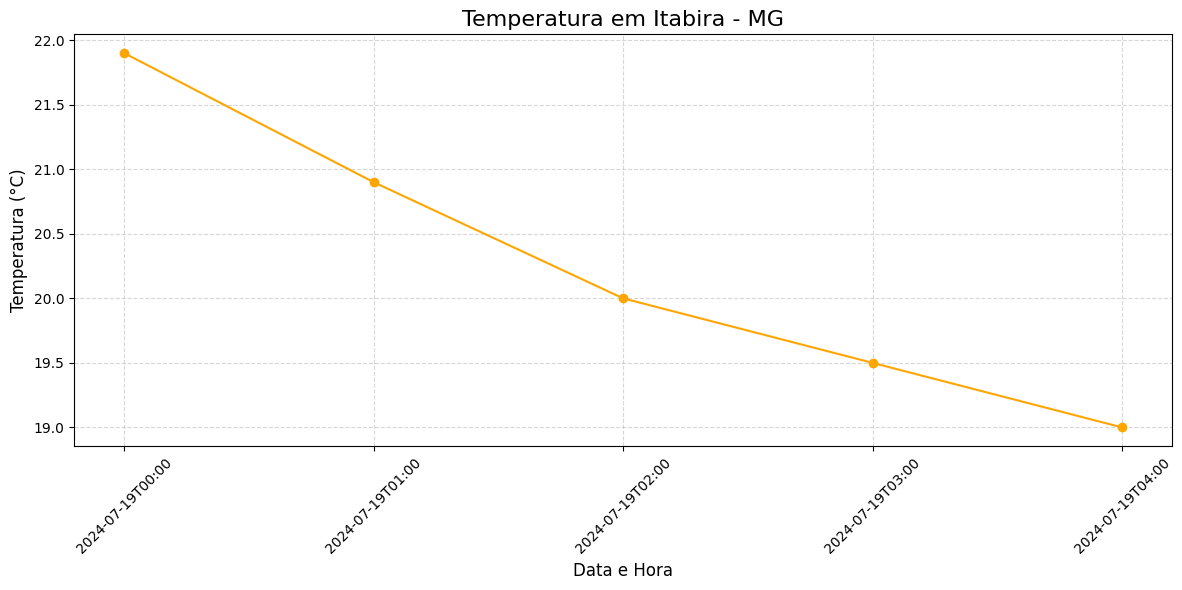

In [8]:
#### Escreva aqui a sua resposta
import matplotlib.pyplot as plt

# Pegando os dados
timestamps = dados_itabira.hourly.time
temperaturas = dados_itabira.hourly.temperature_2m

# Criando o gráfico de linha
plt.figure(figsize=(12,6))
plt.plot(timestamps, temperaturas, marker='o', linestyle='-', color='orange')

# Títulos e rótulos
plt.title("Temperatura em Itabira - MG", fontsize=16)
plt.xlabel("Data e Hora", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Grid opcional
plt.grid(True, linestyle='--', alpha=0.5)

# Exibindo o gráfico
plt.tight_layout()
plt.show()
